Rayyan Ramanda (1103200202)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Prompt: beri kode untuk membaca dataset menjadi dataframe

In [ ]:
# Impor pustaka pandas dengan alias pd
import pandas as pd

# Tentukan jalur file untuk file CSV. Perbarui 'file_path.csv' dengan jalur file aktual Anda.
file_path = '/content/Salary_Data.csv'

# Baca file CSV ke dalam DataFrame yang dinamai df
df = pd.read_csv(file_path)

# Tampilkan isi DataFrame
df


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
# Menampilkan informasi tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [ ]:
# Import library
from sklearn.svm import SVR                   # Mengimpor kelas SVR dari modul sklearn.svm
from sklearn.model_selection import train_test_split   # Mengimpor fungsi train_test_split untuk membagi data
from sklearn.metrics import mean_squared_error   # Mengimpor metrik mean_squared_error untuk evaluasi model
from sklearn.impute import SimpleImputer       # Mengimpor SimpleImputer untuk menangani nilai NaN
import numpy as np                             # Mengimpor numpy untuk operasi numerik

# Data
# Gantilah bagian ini dengan data Anda
# Mengasumsikan df adalah DataFrame yang berisi kolom 'Years of Experience' dan 'Salary'
X = df['Years of Experience'].values.reshape(-1, 1)   # Mengambil kolom 'Years of Experience' sebagai fitur X
y = df['Salary'].values                             # Mengambil kolom 'Salary' sebagai target y

# Handle NaN values in X using SimpleImputer
imputer_X = SimpleImputer(strategy='mean')          # Membuat objek SimpleImputer dengan strategi mengganti NaN dengan mean
X = imputer_X.fit_transform(X)                      # Mengganti NaN dengan mean menggunakan metode fit_transform

# Handle NaN values in y
# Remove rows with NaN values in the target variable
mask = ~np.isnan(y)                                 # Membuat mask untuk menghilangkan baris dengan NaN pada target variable
X = X[mask]                                        # Menerapkan mask pada fitur X
y = y[mask]                                        # Menerapkan mask pada target y

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)   # Membagi data menjadi set pelatihan dan pengujian

# Inisialisasi model SVR dengan hyperparameter tertentu
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')    # Membuat model SVR dengan hyperparameter tertentu

# Melatih model
svr_model.fit(X_train, y_train)                    # Melatih model dengan data pelatihan

# Melakukan prediksi pada set pengujian
y_pred = svr_model.predict(X_test)                # Melakukan prediksi pada data pengujian

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)          # Menghitung Mean Squared Error sebagai metrik evaluasi
print(f'Mean Squared Error: {mse}')               # Menampilkan Mean Squared Error

# Sekarang model SVR dengan hyperparameter yang telah ditentukan sudah dilatih dan diuji.
# Anda dapat menggunakannya untuk membuat prediksi pada data baru.


Mean Squared Error: 770276846.5635625


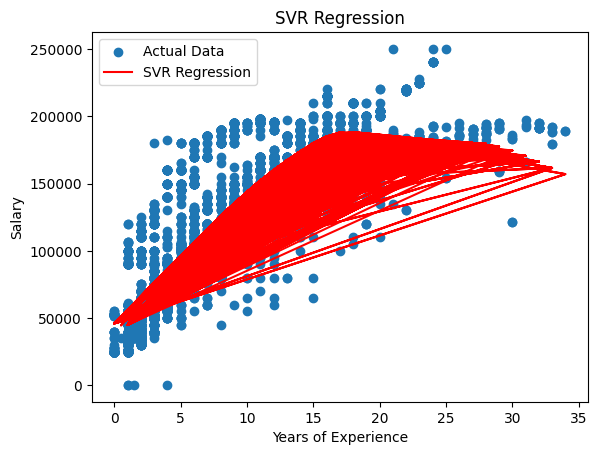

In [ ]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt

# Visualisasi data dan model
plt.scatter(X, y, label='Actual Data')   # Menampilkan scatter plot untuk data asli
plt.plot(X, svr_model.predict(X), color='red', label='SVR Regression')   # Menampilkan garis regresi hasil prediksi model SVR

# Label sumbu
plt.xlabel('Years of Experience')   # Memberi label sumbu x
plt.ylabel('Salary')   # Memberi label sumbu y

# Menambahkan judul
plt.title('SVR Regression')   # Menambahkan judul plot

# Menampilkan legenda
plt.legend()   # Menampilkan legenda yang menjelaskan data asli dan hasil prediksi

# Menampilkan plot
plt.show()   # Menampilkan plot secara keseluruhan


In [ ]:
# Import library untuk pencarian parameter terbaik
from sklearn.model_selection import GridSearchCV

# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svr_model, param_grid, cv=5)   # Membuat objek GridSearchCV dengan model SVR, parameter grid, dan 5-fold cross-validation
grid_search.fit(X_train, y_train)   # Melakukan pencarian parameter terbaik menggunakan data pelatihan

# Tampilkan parameter terbaik
best_params = grid_search.best_params_   # Mendapatkan parameter terbaik dari hasil pencarian
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_   # Mendapatkan model terbaik dari hasil pencarian
y_pred = best_model.predict(X_test)   # Melakukan prediksi pada data pengujian menggunakan model terbaik

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)   # Menghitung Mean Squared Error sebagai metrik evaluasi
print(f'Mean Squared Error on Test Set: {mse}')   # Menampilkan Mean Squared Error pada set pengujian


Best Parameters: {'C': 10000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 751097182.7525438


In [ ]:
# Inisialisasi model baru dengan hyperparameter tertentu
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')   # Membuat objek model SVR baru dengan hyperparameter tertentu

# Melatih model baru menggunakan seluruh dataset
model_baru.fit(X, y)   # Melatih model dengan menggunakan seluruh dataset X dan y

SVR(C=100000, gamma=0.005)

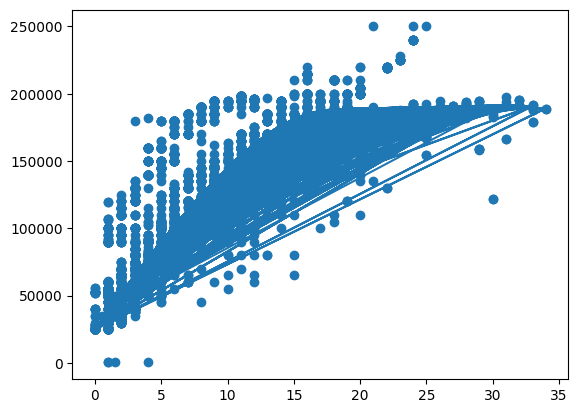

In [ ]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt

# Menampilkan scatter plot untuk data asli
plt.scatter(X, y)

# Menampilkan garis regresi hasil prediksi dari model baru
plt.plot(X, model_baru.predict(X))